(60000, 28, 28)

(60000,)



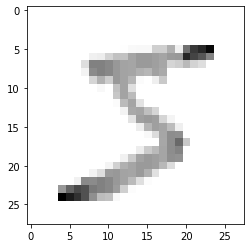


Epoch 1/3
1875/1875 [==============================] - 7s 2ms/step - loss: 1.5985 - accuracy: 0.8738
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5143 - accuracy: 0.9489
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5024 - accuracy: 0.9604


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist # 28x28 pixel images from 0-9
# The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset. 
# It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

(x_train,y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print('')
print(y_train.shape)
print('')

#Normaliszation of train and test data (bring them between 0 and 1)
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()
print('')

# Creating models
model = tf.keras.models.Sequential()

# Now the image pixels are in 28x28 multidimentional shape. We want them to be in one dimentional array. 
# One way to do that is using numpy array and reshape the 2D array into 1D and the other method is used below.
model.add(tf.keras.layers.Flatten())

# Creating hidden layers
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))  # 128 neurons in the hidden layer 1
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))  # 128 neurons in the hidden layer 2
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))  # Output layer, i.e. number of classifications (softmax for probability distribution)

# Adding optimizer, loss funtion, and metrics we want to track 
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = 'accuracy')

# Train the model by fitting the train data
# An epoch means training the neural network with all the training data for one cycle. 
# In an epoch, we use all of the data exactly once. A forward pass and a backward pass together are counted as one pass: 
# An epoch is made up of one or more batches, where we use a part of the dataset to train the neural network.
model.fit(x_train,y_train, epochs = 3)


In [2]:
# Saving model for predictions
model.save('handwritten_digit_classification')

# Load model
new_model = tf.keras.models.load_model('handwritten_digit_classification')

# Predictions on test data
predictions = new_model.predict([x_test])
print(predictions)

INFO:tensorflow:Assets written to: handwritten_digit_classification\assets
313/313 [==============================] - 2s 1ms/step
[[1.5585919e-15 1.7320660e-18 7.9363671e-10 ... 1.0000000e+00
  1.4745134e-16 2.5618401e-14]
 [1.1585892e-12 1.2897585e-16 1.0000000e+00 ... 2.8162653e-23
  3.1427128e-11 1.5077904e-21]
 [1.1443377e-16 9.9999988e-01 7.0627293e-12 ... 7.2147756e-08
  4.1778123e-09 3.9474083e-13]
 ...
 [3.4441651e-16 1.7161912e-14 1.4718732e-13 ... 4.4323443e-08
  3.1682642e-08 1.2277281e-05]
 [3.1787677e-16 5.7564439e-16 2.3779550e-16 ... 1.2103808e-19
  2.0821737e-10 2.8526687e-17]
 [1.5849823e-11 1.2485108e-13 2.7639211e-09 ... 4.2102472e-18
  4.0336854e-14 3.5758292e-14]]


0



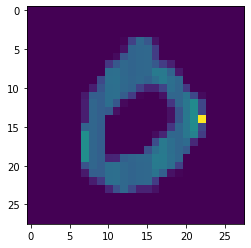

In [3]:
import numpy as np

print(np.argmax(predictions[3]))
print('')

plt.imshow(x_test[3])
plt.show()

In [ ]:
### To convert the given dataset into test - train - validation set

DATASET_SIZE = 60000
TRAIN_RATIO = 0.75
VALIDATION_RATIO = 0.15
TEST_RATIO = 0.10

X = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=(1-TRAIN_RATIO))
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=((TEST_RATIO/(VALIDATION_RATIO+TEST_RATIO))))



In [ ]:
# https://www.analyticsvidhya.com/blog/2021/08/easy-hyperparameter-tuning-in-neural-networks-using-keras-tuner/

# Tuning Hyperparameters in Handwritten_Digit_Classification

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
# import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import *
from scikeras.wrappers import KerasClassifier
from keras.utils import to_categorical
# from sklearn.model_selection import GridSearchCV
import pprint
pp = pprint.PrettyPrinter(indent = 4)

from tensorflow import keras
from keras_tuner import RandomSearch

mnist = tf.keras.datasets.mnist # 28x28 pixel images from 0-9
# The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset. 
# It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [2]:
#Normaliszation of train and test data (bring them between 0 and 1)
# Note that we normalize the data once it is split and not before splitting into train - test set

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [3]:
## Tuning hyperparameters

def build_model(hp):
    keras.backend.clear_session()
    model = Sequential()
    
    # Now the image pixels are in 28x28 multidimentional shape. We want them to be in one dimentional array. 
    # One way to do that is using numpy array and reshape the 2D array into 1D and the other method is used below.
    model.add(tf.keras.layers.Flatten())
    
    # Creating hidden layers
    
    #providing range for number of neurons in a hidden layer 1
    model.add(Dense(units=hp.Int('num_of_neurons',min_value=32,max_value=128,step=32), activation=hp.Choice("activation", ["relu", "tanh"])))
        
    #providing range for number of neurons in a hidden layer 2
    model.add(Dense(units=hp.Int('num_of_neurons',min_value=32,max_value=128,step=32), activation=hp.Choice("activation", ["relu", "tanh"])))
    
    #output layer
    model.add(Dense(10,activation='softmax'))
    
    #compiling the model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2, 1e-3, 1e-4])),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model



In [4]:
import keras_tuner
build_model(keras_tuner.HyperParameters())

In [5]:
#feeding the model and parameters to Random Search
tuner=RandomSearch(build_model,
                   objective='val_accuracy',
                   max_trials=3,
                   executions_per_trial=2,
                   overwrite=True,
                   directory='tuner1',
                   project_name='Mnist')


In [6]:
#this tells us how many hyperparameter we are tuning
#in our case it's 3 = neurons, activation fun, learning rate
tuner.search_space_summary()

Search space summary
Default search space size: 3
num_of_neurons (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': None}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [7]:
#fitting the tuner on train dataset
tuner.search(x_train,y_train, epochs=8, validation_data=(x_test,y_test))

Trial 3 Complete [00h 01m 02s]
val_accuracy: 0.9483500123023987

Best val_accuracy So Far: 0.9748499989509583
Total elapsed time: 00h 03m 07s
INFO:tensorflow:Oracle triggered exit


In [8]:
tuner.results_summary()

Results summary
Results in tuner1\Mnist
Showing 10 best trials
Trial summary
Hyperparameters:
num_of_neurons: 96
activation: tanh
learning_rate: 0.001
Score: 0.9748499989509583
Trial summary
Hyperparameters:
num_of_neurons: 64
activation: tanh
learning_rate: 0.001
Score: 0.9718500077724457
Trial summary
Hyperparameters:
num_of_neurons: 64
activation: relu
learning_rate: 0.0001
Score: 0.9483500123023987


In [23]:
# Let’s tune some more parameters in the next code. Here we are also providing the range of the number of layers to be used in the model which is between 2 to 10.

def build_model(hp):                 #hp means hyper parameters
    model=Sequential()
    model.add(tf.keras.layers.Flatten())
    
    #providing the range for hidden layers  
    for i in range(hp.Int('num_of_layers',2,8)):
        
        if hp.Boolean("dropout"):
            model.add(Dropout(rate=0.25))
        
        #providing range for number of neurons in hidden layers
        model.add(Dense(units=hp.Int('num_of_neurons'+ str(i),min_value=32,max_value=128,step=32),activation=hp.Choice("activation", ["relu", "tanh"])))
        
    
    #output layer
    model.add(Dense(10,activation='softmax'))    
    
    #compiling the model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2, 1e-3, 1e-4])),   #tuning learning rate
                  loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

In [24]:
#feeding the model and parameters to Random Search
tuner=RandomSearch(build_model,
    objective='val_accuracy',
    max_trials=4,
    executions_per_trial=3,
    overwrite=True,
    directory='tuner2',
    project_name='Mnist')

In [25]:
#tells us how many hyperparameters we are tuning
#in our case it's 4 = layers, neurons, activation function, learning rate
tuner.search_space_summary()

Search space summary
Default search space size: 6
num_of_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 8, 'step': 1, 'sampling': None}
dropout (Boolean)
{'default': False, 'conditions': []}
num_of_neurons0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': None}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
num_of_neurons1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [26]:
#fitting the tuner
tuner.search(x_train,y_train,epochs=8,validation_data=(x_test,y_test))

Trial 4 Complete [00h 02m 14s]
val_accuracy: 0.9660666783650717

Best val_accuracy So Far: 0.9660666783650717
Total elapsed time: 00h 08m 19s
INFO:tensorflow:Oracle triggered exit


In [27]:
# Summary and the best accuracy of the model in the below code.
tuner.results_summary()

Results summary
Results in tuner2\Mnist
Showing 10 best trials
Trial summary
Hyperparameters:
num_of_layers: 5
dropout: False
num_of_neurons0: 64
activation: tanh
num_of_neurons1: 64
learning_rate: 0.001
num_of_neurons2: 32
num_of_neurons3: 128
num_of_neurons4: 64
num_of_neurons5: 96
Score: 0.9660666783650717
Trial summary
Hyperparameters:
num_of_layers: 6
dropout: True
num_of_neurons0: 64
activation: relu
num_of_neurons1: 64
learning_rate: 0.001
num_of_neurons2: 96
num_of_neurons3: 32
num_of_neurons4: 32
num_of_neurons5: 32
Score: 0.959933320681254
Trial summary
Hyperparameters:
num_of_layers: 3
dropout: True
num_of_neurons0: 64
activation: tanh
num_of_neurons1: 96
learning_rate: 0.0001
num_of_neurons2: 32
Score: 0.9255333344141642
Trial summary
Hyperparameters:
num_of_layers: 6
dropout: False
num_of_neurons0: 64
activation: tanh
num_of_neurons1: 96
learning_rate: 0.01
num_of_neurons2: 128
num_of_neurons3: 128
num_of_neurons4: 96
num_of_neurons5: 128
Score: 0.8747666676839193
